Random Seed:  3578
*** Images Generated from best model:


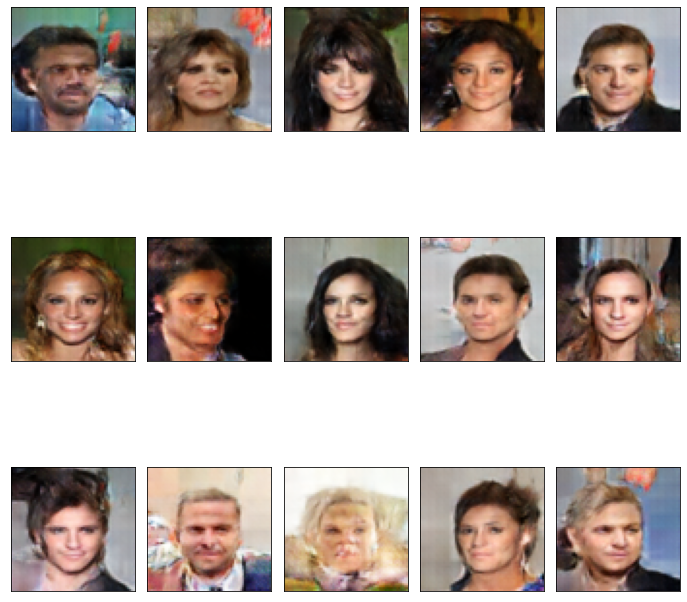

In [1]:
# Plot images from best or last model
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import torchvision

%load_ext autoreload
%autoreload 2
import torch
from models.base_model import Generator
import os
import utils.plot as plot
import matplotlib.pyplot as plt

manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

device = 'cpu'
gen = Generator(z_dim=128)

n=150

if os.path.isfile('final_model.pt'):
    gen = torch.load('final_model.pt', map_location=device)
print('*** Images Generated from best model:')

num_of_pics = 15

features = torch.rand((num_of_pics,40))
zeros = torch.zeros((num_of_pics,40))
zeros = zeros-1
one = torch.ones((num_of_pics,40))
features = torch.where(features>0.975, one, zeros)
# features[:,9] = 1
samples = gen.sample(num_of_pics, features, with_grad=False).cpu()
fig, _ = plot.tensors_as_images(samples, nrows=3, figsize=(12,12))